In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
# Load csv
data = pd.read_csv('/Users/triciascy/code/toothyachy/yumspeak/raw_data/restaurant_data/cleaned_data_sgr.csv')

data

,Restaurant Name,Type,Ratings,Number of Reviews,Price Range,Address,Opening Timing,Open now?,Reviews,Key Word 1,Key Word 2
0,Restaurant Ibid,Asian Fusion,4.9,(788),$100+,18 N Canal Rd,Opens 6:30 pm,Closed,"""The was creative, refine, delicious and well...",food,NaN
1,Cherki,Restaurant,4.5,(638),$20–40,"1 Straits Blvd, #01-02",Opens 12 pm,Closed,"""Wide selection of cocktails, tasty dishes an...",fusion,NaN
2,The Dragon Chamber,Restaurant,4.4,(781),$$,2 Circular Rd,NaN,NaN,"""The flavors are bold and innovative, and the ...",NaN,NaN
3,Xiao Ya Tou,Chinese,4.4,(642),$$$,"6 Duxton Hill, #01-01",11:30 am,Opens soon,"""Nice with a very quirky and retro decor.""",fusion restaurant,NaN
4,URESHII(WAGYU SUKIYAKI & ABALONE),Japanese,4.6,(94),Opens 11:50 am,Singapore,NaN,Closed,"""This is a Korean Japanese with amazing sake ...",fusion restaurant,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4586,Wa-i Exclusive,Restaurant,4.7,(36),"2 Havelock Road, Havelock 2, #01-03",$100+,Closed,Opens 12 pm,"""They serve wine at a decent price.""",french,NaN
4587,PAUL,French,4.0,(194),$30–40,8A Marina Boulevard B2-07 Marina Bay Link Mall,NaN,NaN,"""Food is excellent, good portion for 2. Fresh ...",NaN,NaN
4588,Clos | Deli & Wine House,French,4.6,(408),NaN,"46 Kim Yam Rd, #01-18 New Bahru",NaN,Temporarily closed,"""Authentic , the lobster bisque dumplings was ...",French cuisine,NaN
4589,béni Singapore,French,4.5,(227),$100+,"333A Orchard Road, #02-37 Mandarin Gallery",NaN,Temporarily closed,"""The food are quite flavourful and creative pa...",NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant Name    4591 non-null   object 
 1   Type               4591 non-null   object 
 2   Ratings            4480 non-null   float64
 3   Number of Reviews  4480 non-null   object 
 4   Price Range        4129 non-null   object 
 5   Address            4392 non-null   object 
 6   Opening Timing     1746 non-null   object 
 7   Open now?          2076 non-null   object 
 8   Reviews            3308 non-null   object 
 9   Key Word 1         1549 non-null   object 
 10  Key Word 2         39 non-null     object 
dtypes: float64(1), object(10)
memory usage: 394.7+ KB


In [16]:
# ['Number of Reviews'] cleaning
data['Number of Reviews'] = data['Number of Reviews'].fillna('0')

In [17]:
data['Number of Reviews'].isnull().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant Name    4591 non-null   object 
 1   Type               4591 non-null   object 
 2   Ratings            4480 non-null   float64
 3   Number of Reviews  4591 non-null   object 
 4   Price Range        4129 non-null   object 
 5   Address            4392 non-null   object 
 6   Opening Timing     1746 non-null   object 
 7   Open now?          2076 non-null   object 
 8   Reviews            3308 non-null   object 
 9   Key Word 1         1549 non-null   object 
 10  Key Word 2         39 non-null     object 
dtypes: float64(1), object(10)
memory usage: 394.7+ KB


In [18]:
data['Number of Reviews'] = data['Number of Reviews'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')

In [42]:
data['Restaurant Name'] = data['Restaurant Name'].replace({'#':''}, regex=True)
data


,Restaurant Name,Type,Ratings,Number of Reviews,Price Range,Address,Opening Timing,Open now?,Reviews,Key Word 1,Key Word 2
0,01-22 Wufu Hakka Noodle,Noodle Shop,5.0,1,NaN,Singapore,NaN,NaN,"""Very tasty noodle!""",Hakka,NaN
1,Foodcoholic,Restaurant,4.5,252,$10–20,"40 Circular Rd, #01-01",11:30 am,Opens soon,"""Good , excellent vibe, reasonable prices, fri...",food,NaN
2,julkitchen,European,5.0,33,NaN,"53 Telok Blangah Dr, #02-72",NaN,Temporarily closed,NaN,NaN,NaN
3,(Fu Chan) Harummanis Muslim Food,Malaysian,2.1,35,145 Teck Whye Ln,$1–10,NaN,NaN,"""Nasi Lemak Chicken Wing: it was good!""",NaN,NaN
4,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,Vietnamese,4.5,265,$10–20,"1 Kim Seng Promenade, Floor 3",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4586,鼎鼎紅麻辣香鍋 Ding Ding Hong Mala HotPot,Hot Pot,3.5,35,NaN,"1 Kadayanallur St, #01-41",NaN,NaN,"""The itself is average but it is really value...",mala,NaN
4587,안녕하세요 Hello Korean BBQ,Korean BBQ,4.0,400,$$,45 / 46 Circular Rd,11:30 am,Opens soon,NaN,NaN,NaN
4588,예약 YeYak Korean Restaurant,Korean,4.8,243,Opens 5:30 pm,Singapore,NaN,Closed,NaN,NaN,NaN
4589,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,Indian,4.2,1000,NaN,"01-33H, The Centrepoint, 176 Orchard Rd",NaN,NaN,"""The food is really authentic in terms of tast...",NaN,NaN


In [46]:
data = data.sort_values(by='Restaurant Name', ascending=True).reset_index(drop=True)
data

,Restaurant Name,Type,Ratings,Number of Reviews,Price Range,Address,Opening Timing,Open now?,Reviews,Key Word 1,Key Word 2
0,(Fu Chan) Harummanis Muslim Food,Malaysian,2.1,35,145 Teck Whye Ln,$1–10,NaN,NaN,"""Nasi Lemak Chicken Wing: it was good!""",NaN,NaN
1,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,Vietnamese,4.5,265,$10–20,"1 Kim Seng Promenade, Floor 3",NaN,NaN,NaN,NaN,NaN
2,01-22 Wufu Hakka Noodle,Noodle Shop,5.0,1,NaN,Singapore,NaN,NaN,"""Very tasty noodle!""",Hakka,NaN
3,116 PHỐ ĐÊM,Vietnamese,5.0,3,NaN,116 Mackenzie Rd,NaN,NaN,NaN,NaN,NaN
4,123 ZÔ - Ẩm Thực Việt,Restaurant,4.4,252,$10–20,"12 Gopeng St, #01-45, 49-51 icon village",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4586,鼎鼎紅麻辣香鍋 Ding Ding Hong Mala HotPot,Hot Pot,3.5,35,NaN,"1 Kadayanallur St, #01-41",NaN,NaN,"""The itself is average but it is really value...",mala,NaN
4587,안녕하세요 Hello Korean BBQ,Korean BBQ,4.0,400,$$,45 / 46 Circular Rd,11:30 am,Opens soon,NaN,NaN,NaN
4588,예약 YeYak Korean Restaurant,Korean,4.8,243,Opens 5:30 pm,Singapore,NaN,Closed,NaN,NaN,NaN
4589,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,Indian,4.2,1000,NaN,"01-33H, The Centrepoint, 176 Orchard Rd",NaN,NaN,"""The food is really authentic in terms of tast...",NaN,NaN


In [47]:
data.to_csv('/Users/triciascy/code/toothyachy/yumspeak/raw_data/restaurants_sorted.csv')

In [8]:
print(data['Number of Reviews'].max())
data['Number of Reviews'].min()

51000


0

In [93]:
# restaurants with reviews < 301
reviews_100 = data[data['Number of Reviews']<101]
reviews_200 = data[data['Number of Reviews']<201]
reviews_300 = data[data['Number of Reviews']<301]

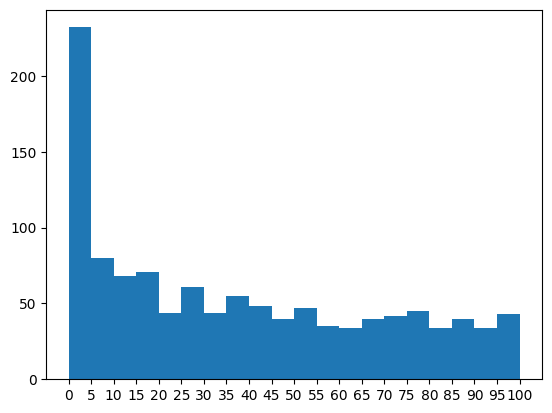

In [119]:
# histplot of restaurants with few reviews
plt.hist(reviews_100['Number of Reviews'], bins=20)
plt.xticks(np.arange(0,101,5));

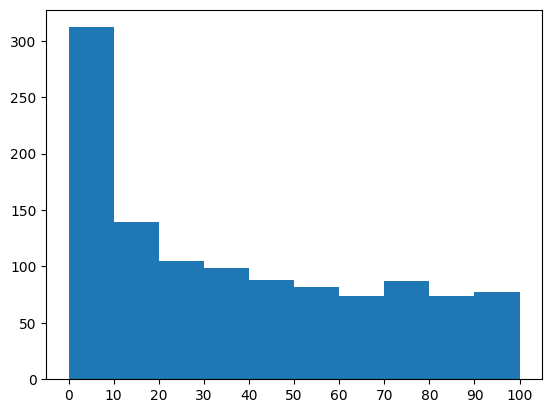

In [115]:
plt.hist(reviews_100['Number of Reviews'], bins=10)
plt.xticks(np.arange(0,101,10));

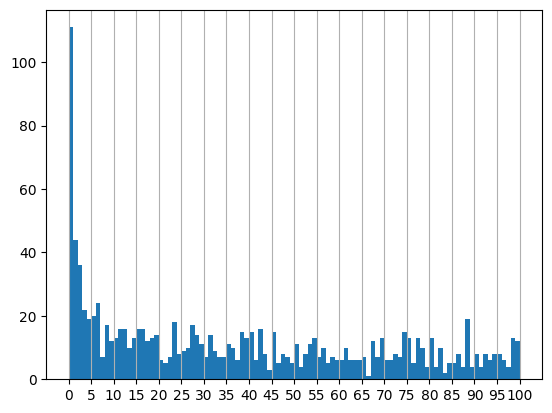

In [124]:
plt.hist(reviews_100['Number of Reviews'], bins=100)
plt.xticks(np.arange(0,101,5))
plt.grid(axis='x');

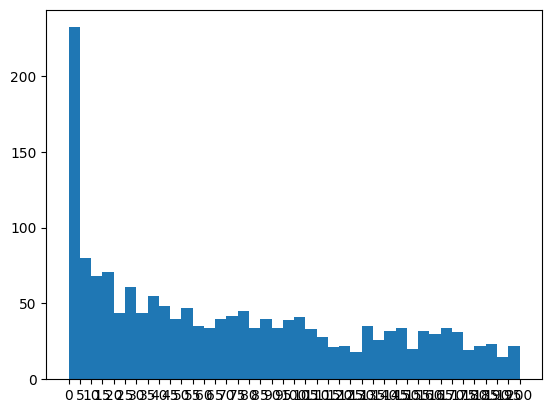

In [90]:
plt.hist(reviews_200['Number of Reviews'], bins=40)
plt.xticks(np.arange(0,201,5));

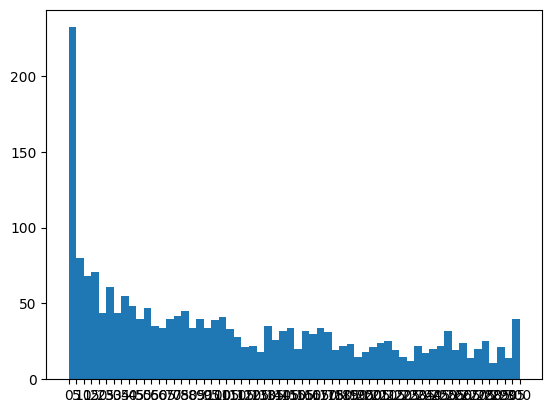

In [91]:
plt.hist(reviews_300['Number of Reviews'], bins=60)
plt.xticks(np.arange(0,301,5));

In [101]:
# ['Price Range'] cleaning
data['Price Range'].isnull().sum()

462

In [112]:
price_range = pd.DataFrame(data['Price Range'].value_counts()).reset_index()
price_range.columns = ['Price Range', 'Counts']
price_range

,Price Range,Counts
0,$10–20,616
1,$100+,510
2,$$,413
3,$20–30,387
4,$1–10,343
...,...,...
798,83a Geylang Rd,1
799,"Bishan St.11, #01-408 Block 505d",1
800,"101 Upper Cross Street #02-58, People's Park C...",1
801,"190 Clemenceau Ave, #01-28 Singapore Shopping ...",1


In [5]:
data.columns

Index(['Restaurant Name', 'Type', 'Ratings', 'Number of Reviews',
       'Price Range', 'Address', 'Opening Timing', 'Open now?', 'Reviews',
       'Key Word 1', 'Key Word 2'],
      dtype='object')

In [6]:
df = data[['Restaurant Name','Number of Reviews','Price Range','Address']]
df

,Restaurant Name,Number of Reviews,Price Range,Address
0,Restaurant Ibid,(788),$100+,18 N Canal Rd
1,Cherki,(638),$20–40,"1 Straits Blvd, #01-02"
2,The Dragon Chamber,(781),$$,2 Circular Rd
3,Xiao Ya Tou,(642),$$$,"6 Duxton Hill, #01-01"
4,URESHII(WAGYU SUKIYAKI & ABALONE),(94),Opens 11:50 am,Singapore
...,...,...,...,...
4586,Wa-i Exclusive,(36),"2 Havelock Road, Havelock 2, #01-03",$100+
4587,PAUL,(194),$30–40,8A Marina Boulevard B2-07 Marina Bay Link Mall
4588,Clos | Deli & Wine House,(408),NaN,"46 Kim Yam Rd, #01-18 New Bahru"
4589,béni Singapore,(227),$100+,"333A Orchard Road, #02-37 Mandarin Gallery"


In [8]:
add1 = df['Address'][0]
add1

'18 N Canal Rd'

In [9]:
import geocoder

def get_latlng(address):
    g = geocoder.mapbox(f"{address},SG", key='pk.eyJ1Ijoic2N5dHJpY2lhIiwiYSI6ImNtMGM3c3h3cDAwYTcya3ExeTB1cWd4MzMifQ.QWP6BN8Me5GDTisQV5Rcaw')
    latlng = (g.json['lat'], g.json['lng'])

    return latlng

In [ ]:
get_latlng('Singapore')

(1.288799, 103.840943)

In [152]:
df_5 = df[0:5].copy()
df_5

,Restaurant Name,Number of Reviews,Price Range,Address
0,Restaurant Ibid,(788),$100+,18 N Canal Rd
1,Cherki,(638),$20–40,"1 Straits Blvd, 01-02"
2,The Dragon Chamber,(781),$$,2 Circular Rd
3,Xiao Ya Tou,(642),$$$,"6 Duxton Hill, 01-01"
4,URESHII(WAGYU SUKIYAKI & ABALONE),(94),Opens 11:50 am,Singapore


In [142]:
def coordinates(address):
    if address == 'Singapore':
        return (1.288799, 103.840943)
    else:
        return get_latlng(address)

In [147]:
get_latlng('1 straits blvd,SG')

(1.275829, 103.849516)

In [ ]:
df_5['Address'] = df_5['Address'].replace({'#*': ''}, regex=True)
df_5

In [154]:
df_5['coordinates'] = df_5['Address'].apply(coordinates)
df_5

,Restaurant Name,Number of Reviews,Price Range,Address,coordinates
0,Restaurant Ibid,(788),$100+,18 N Canal Rd,"(1.286453, 103.848349)"
1,Cherki,(638),$20–40,"1 Straits Blvd, 01-02","(1.275829, 103.849516)"
2,The Dragon Chamber,(781),$$,2 Circular Rd,"(1.288079, 103.848957)"
3,Xiao Ya Tou,(642),$$$,"6 Duxton Hill, 01-01","(1.279362, 103.842878)"
4,URESHII(WAGYU SUKIYAKI & ABALONE),(94),Opens 11:50 am,Singapore,"(1.288799, 103.840943)"


In [113]:
# lat lng for an address
get_latlng(('20 Collyer quay'))

(1.284681, 103.852783)

In [18]:
df['Address'].isna().sum()

199

In [32]:
df['Address']=='Singapore').sum()

679

In [72]:
target_df = pd.read_csv('/Users/triciascy/code/toothyachy/yumspeak/raw_data/clean_clean_sgr.csv')

In [73]:
target_df = target_df.drop(890) #remove waxing hair removal service
target_df = target_df.drop(1227) # remove Fuk Tak Chi Museum (temple)
target_df = target_df.drop(4395) # remove Ying Fo Fui Kun (assc clan)
target_df = target_df.drop(1845) # remove Kele Bakery shop
target_df = target_df.drop(1212) # remove Friendly Vegetarian Food Supplier
target_df = target_df.drop(1044) # remove Eatbook.sg (media company)
target_df = target_df.drop(1308) # remove Golden Mile Tower
target_df = target_df.drop(1533) # remove Hotel Miramar Singapore
target_df = target_df.drop(2386) # remove Mondrian Singapore Duxton
target_df = target_df.drop(222) # remove Annabella Patisserie Trading Pte Ltd
target_df = target_df.drop(1680) # remove J Petite Patisserie
target_df = target_df.drop(1759) # remove Joo Hwa Food Industries
target_df = target_df.drop(1791) # remove KOI the (bbt shop)
target_df = target_df.drop(3141) # remove Royal Cuisine Group (catering)
target_df = target_df.drop(2583) # remove Nonya Buffet
target_df = target_df.drop(2584) # remove Nonya Buffet


target_df['Type'] = target_df['Type'].str.lower().str.strip()
# Drop rows where 'Type' is 'hawker stall'
target_df = target_df[target_df['Type'] != 'hawker stall']
# Drop rows where 'Type' is 'hawker center'
target_df = target_df[target_df['Type'] != 'hawker center']
# Drop rows where 'Type' is 'food court'
target_df = target_df[target_df['Type'] != 'food court']
#remove MBS
target_df = target_df.drop(2294)

In [76]:
data_df = target_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data_df

,Restaurant Name,Type,Ratings,Number of Reviews,Price Range,Address,Opening Timing,Open now?,Reviews,Key Word 1,Key Word 2
0,(Fu Chan) Harummanis Muslim Food,malaysian,2.1,35,145 Teck Whye Ln,$1–10,NaN,NaN,"""Nasi Lemak Chicken Wing: it was good!""",NaN,NaN
1,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,vietnamese,4.5,265,$10–20,"1 Kim Seng Promenade, Floor 3",NaN,NaN,NaN,NaN,NaN
2,01-22 Wufu Hakka Noodle,noodle shop,5.0,1,NaN,Singapore,NaN,NaN,"""Very tasty noodle!""",Hakka,NaN
3,116 PHỐ ĐÊM,vietnamese,5.0,3,NaN,116 Mackenzie Rd,NaN,NaN,NaN,NaN,NaN
4,123 ZÔ - Ẩm Thực Việt,restaurant,4.4,252,$10–20,"12 Gopeng St, #01-45, 49-51 icon village",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4566,鼎鼎紅麻辣香鍋 Ding Ding Hong Mala HotPot,hot pot,3.5,35,NaN,"1 Kadayanallur St, #01-41",NaN,NaN,"""The itself is average but it is really value...",mala,NaN
4567,안녕하세요 Hello Korean BBQ,korean bbq,4.0,400,$$,45 / 46 Circular Rd,11:30 am,Opens soon,NaN,NaN,NaN
4568,예약 YeYak Korean Restaurant,korean,4.8,243,Opens 5:30 pm,Singapore,NaN,Closed,NaN,NaN,NaN
4569,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,indian,4.2,1000,NaN,"01-33H, The Centrepoint, 176 Orchard Rd",NaN,NaN,"""The food is really authentic in terms of tast...",NaN,NaN


In [77]:
data_df['cleaned_address'] = target_df['Address'].replace({'Opens.*': '', 'Closes.*': '', '\$.*': ''}, regex=True)
data_df

,Restaurant Name,Type,Ratings,Number of Reviews,Price Range,Address,Opening Timing,Open now?,Reviews,Key Word 1,Key Word 2,cleaned_address
0,(Fu Chan) Harummanis Muslim Food,malaysian,2.1,35,145 Teck Whye Ln,$1–10,NaN,NaN,"""Nasi Lemak Chicken Wing: it was good!""",NaN,NaN,
1,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,vietnamese,4.5,265,$10–20,"1 Kim Seng Promenade, Floor 3",NaN,NaN,NaN,NaN,NaN,"1 Kim Seng Promenade, Floor 3"
2,01-22 Wufu Hakka Noodle,noodle shop,5.0,1,NaN,Singapore,NaN,NaN,"""Very tasty noodle!""",Hakka,NaN,Singapore
3,116 PHỐ ĐÊM,vietnamese,5.0,3,NaN,116 Mackenzie Rd,NaN,NaN,NaN,NaN,NaN,116 Mackenzie Rd
4,123 ZÔ - Ẩm Thực Việt,restaurant,4.4,252,$10–20,"12 Gopeng St, #01-45, 49-51 icon village",NaN,NaN,NaN,NaN,NaN,"12 Gopeng St, #01-45, 49-51 icon village"
...,...,...,...,...,...,...,...,...,...,...,...,...
4566,鼎鼎紅麻辣香鍋 Ding Ding Hong Mala HotPot,hot pot,3.5,35,NaN,"1 Kadayanallur St, #01-41",NaN,NaN,"""The itself is average but it is really value...",mala,NaN,"1 Kadayanallur St, #01-41"
4567,안녕하세요 Hello Korean BBQ,korean bbq,4.0,400,$$,45 / 46 Circular Rd,11:30 am,Opens soon,NaN,NaN,NaN,45 / 46 Circular Rd
4568,예약 YeYak Korean Restaurant,korean,4.8,243,Opens 5:30 pm,Singapore,NaN,Closed,NaN,NaN,NaN,Singapore
4569,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,indian,4.2,1000,NaN,"01-33H, The Centrepoint, 176 Orchard Rd",NaN,NaN,"""The food is really authentic in terms of tast...",NaN,NaN,"01-33H, The Centrepoint, 176 Orchard Rd"


In [92]:
empty_add_df = data_df[data_df['cleaned_address'] == ""]
empty_add_df['cleaned_address'] = empty_add_df['Price Range']
empty_add_df = empty_add_df[['Restaurant Name', 'cleaned_address']].reset_index(drop=True)
empty_add_df

/var/folders/hr/cpz20c0528n3lthhycz7r5ch0000gn/T/ipykernel_9651/2843816203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_add_df['cleaned_address'] = empty_add_df['Price Range']


,Restaurant Name,cleaned_address
0,(Fu Chan) Harummanis Muslim Food,145 Teck Whye Ln
1,168 CMY Satay,"335, Smith Street, #02-168, Chinatown Complex,..."
2,17 Turkish Doner Kebab and Catering,"1 Rochor Canal Rd, #B1-08/26 Sim Lim Square"
3,2am: dessertbar,21A Lor Liput
4,2it & Drink,"491 River Valley Rd, #01-01 Valley Point"
...,...,...
679,七里香 QILIXIANG,"103 Irrawaddy Rd, #01-27"
680,快乐老家 Kuai Le Lao Jia Restaurant,"Mosque St, #45"
681,泉馨園（清記）Quan Xin Yuan Seafood Restaurant,Singapore
682,金隆海鲜楼 Jing Long Seafood Restaurant @ BEDOK,"412 Bedok North Ave 2, #01-152"


In [88]:
empty_add_df[empty_add_df['cleaned_address']==' 11 am']

,Restaurant Name,Type,Ratings,Number of Reviews,Price Range,Address,Opening Timing,Open now?,Reviews,Key Word 1,Key Word 2,cleaned_address


In [97]:
empty_add_df = empty_add_df.drop_duplicates()
empty_add_df

,Restaurant Name,cleaned_address
0,(Fu Chan) Harummanis Muslim Food,145 Teck Whye Ln
1,168 CMY Satay,"335, Smith Street, #02-168, Chinatown Complex,..."
2,17 Turkish Doner Kebab and Catering,"1 Rochor Canal Rd, #B1-08/26 Sim Lim Square"
3,2am: dessertbar,21A Lor Liput
4,2it & Drink,"491 River Valley Rd, #01-01 Valley Point"
...,...,...
679,七里香 QILIXIANG,"103 Irrawaddy Rd, #01-27"
680,快乐老家 Kuai Le Lao Jia Restaurant,"Mosque St, #45"
681,泉馨園（清記）Quan Xin Yuan Seafood Restaurant,Singapore
682,金隆海鲜楼 Jing Long Seafood Restaurant @ BEDOK,"412 Bedok North Ave 2, #01-152"


In [80]:
empty_add_df.to_csv('/Users/triciascy/code/toothyachy/yumspeak/empty_add.csv')

In [98]:
clean_add_df = data_df[data_df['cleaned_address'] != ""]
clean_add_df = clean_add_df[['Restaurant Name', 'cleaned_address']]
clean_add_df

,Restaurant Name,cleaned_address
1,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,"1 Kim Seng Promenade, Floor 3"
2,01-22 Wufu Hakka Noodle,Singapore
3,116 PHỐ ĐÊM,116 Mackenzie Rd
4,123 ZÔ - Ẩm Thực Việt,"12 Gopeng St, #01-45, 49-51 icon village"
5,123 Zô The Việt Kitchen,"18 Raffles Quay, #01-48 Lau Pa Sat"
...,...,...
4566,鼎鼎紅麻辣香鍋 Ding Ding Hong Mala HotPot,"1 Kadayanallur St, #01-41"
4567,안녕하세요 Hello Korean BBQ,45 / 46 Circular Rd
4568,예약 YeYak Korean Restaurant,Singapore
4569,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,"01-33H, The Centrepoint, 176 Orchard Rd"


In [99]:
clean_add_df.duplicated().sum()

909

In [100]:
clean_add_df = clean_add_df.drop_duplicates()
clean_add_df

,Restaurant Name,cleaned_address
1,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,"1 Kim Seng Promenade, Floor 3"
2,01-22 Wufu Hakka Noodle,Singapore
3,116 PHỐ ĐÊM,116 Mackenzie Rd
4,123 ZÔ - Ẩm Thực Việt,"12 Gopeng St, #01-45, 49-51 icon village"
5,123 Zô The Việt Kitchen,"18 Raffles Quay, #01-48 Lau Pa Sat"
...,...,...
4565,麻辣诱惑 Spice Spirits Singapore,14 Foch Rd
4566,鼎鼎紅麻辣香鍋 Ding Ding Hong Mala HotPot,"1 Kadayanallur St, #01-41"
4567,안녕하세요 Hello Korean BBQ,45 / 46 Circular Rd
4568,예약 YeYak Korean Restaurant,Singapore


In [89]:
clean_add_df[clean_add_df['cleaned_address']==' 11 am']

,Restaurant Name,cleaned_address


In [104]:
final_df = pd.concat([clean_add_df, empty_add_df])

In [107]:
final_df = final_df.drop_duplicates()
final_df

,Restaurant Name,cleaned_address
1,(Viet Taste) Vietnamese Cuisine @ Food Junctio...,"1 Kim Seng Promenade, Floor 3"
2,01-22 Wufu Hakka Noodle,Singapore
3,116 PHỐ ĐÊM,116 Mackenzie Rd
4,123 ZÔ - Ẩm Thực Việt,"12 Gopeng St, #01-45, 49-51 icon village"
5,123 Zô The Việt Kitchen,"18 Raffles Quay, #01-48 Lau Pa Sat"
...,...,...
673,estiatorio Milos,"2 Bayfront Ave, B1-48 The Shoppes"
675,"indorica, Traditional Indonesian Food (313@Som...","313@Somerset, 313 Orchard Rd, Level 5 Food Rep..."
676,"indosunda, Traditional Indonesian Food",Singapore
679,七里香 QILIXIANG,"103 Irrawaddy Rd, #01-27"


In [108]:
final_df.to_csv('/Users/triciascy/code/toothyachy/yumspeak/final_df.csv')